In [11]:
import urllib.request as req
import matplotlib.pyplot as plt
import pandas as pd
import bs4
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d as mpl3d
import numpy as np

# import matplotlib.pyplot as plt 

In [21]:
def inputstock(url):
    "https://histock.tw/stock/financial.aspx?no={0}&t=2".format(str(url))
    return url

def eps(url_data): # eps
    EPS_bf4 = []
    titles = root.find_all("td",class_="b-b") # 尋找所有 class=title 的div標

    for i in range(2,32,5):
        EPS_bf4.append(titles[i].string)
    return EPS_bf4

def interest_stock(url_data): # 股票股利
    interest = []
    interest_stock = root.find_all("td",class_="b-b")
    for i in range(1,31,5):
        interest.append(interest_stock[i].string)
    return interest

def interest_money(url_data):
    interest_money = []
    interest_moneys = root.find_all("td")
#     print(interest_moneys)
    for i in range(6,78,13):
        interest_money.append(interest_moneys[i].string)
    return interest_money

def now_stock(url_data):
    now = []
    now_stock = root.find_all("span",class_="clr-gr")
#     print(now_stock)
    for i in range(0,3,1):
        now.append(now_stock[i].string)
    return now
    
def stock_price(url_data):
    price = []
    stock_price = root.find_all("td")
#     print(stock_price)
    for i in range(4,72,13):
        price.append(stock_price[i].string)
    return price   

def epsyear(url_data):
    year2020 = []
    epsyear = root.find_all("td",class_="date")
#     print(epsyear)
    for i in range(0,12,2):
        year2020.append(epsyear[i].string)
    return year2020


EPS: ['1.19', '1.07', '1.10', '1.09', '1.30', '0.08']
股票股利: ['0.23', '0.21', '0.44', '0.43', '0.72', '0']
現金股利: ['0.57', '0.51', '0.54', '0.53', '0.48', '0.1']
今日股價: ['13.15', '▼0.05', '-0.38%']
除息前價格: ['13.85', '14.3', '15.35', '13.9', '13.15', '12.6']
年份: ['2019', '2018', '2017', '2016', '2015', '2014']


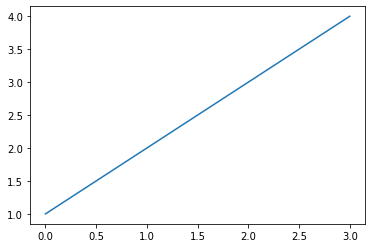

In [22]:
url="https://histock.tw/stock/financial.aspx?no=2887&t=2"

#附加headers 偽裝一般使用者
request = req.Request(url, headers={
    "user-agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.105 Safari/537.36"
})

with req.urlopen(request) as response:
    data = response.read().decode("utf-8")
# print(data)
#解析原始碼


root = bs4.BeautifulSoup(data,"html.parser")

origin = []

result = eps(data)

print("EPS: {0}".format(result))

results = interest_stock(data)
print("股票股利: {0}".format(results))

results = interest_money(data)
print("現金股利: {0}".format(results))
# print(now_stock(data))
results = now_stock(data)
print("今日股價: {0}".format(results))
results = stock_price(data)
print("除息前價格: {0}".format(results))

results = epsyear(data)
print("年份: {0}".format(results))

plt.plot([1,2,3,4])
plt.show()